Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:
# Loading dataset into a Pandas DataFrame
car_dataset = pd.read_csv("car data.csv")

In [3]:
# Printing first 5 rows from DataFrame
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
# More information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Checking the missing values
car_dataset.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Checking the distribution of categorical variables
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
# Encoding "Fuel_Type" column
car_dataset.replace({'Fuel_Type' : {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

# Encoding "Seller_Type" column
car_dataset.replace({'Seller_Type' : {'Dealer': 0, 'Individual': 1}}, inplace=True)

# Encoding "Transmission" column
car_dataset.replace({'Transmission' : {'Manual': 0, 'Automatic': 1}}, inplace=True)

In [11]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting data into features and target variables

In [12]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_dataset['Selling_Price']

In [13]:
print(X)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting Training and Test data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


Model Training

    1. Linear Regression

In [16]:
lin_reg_model = LinearRegression()

In [17]:
lin_reg_model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [18]:
# Predictions on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [19]:
# R-squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R-squared Error: ", error_score)

R-squared Error:  0.8818316992327145


Visualize the actual prices and predicted prices

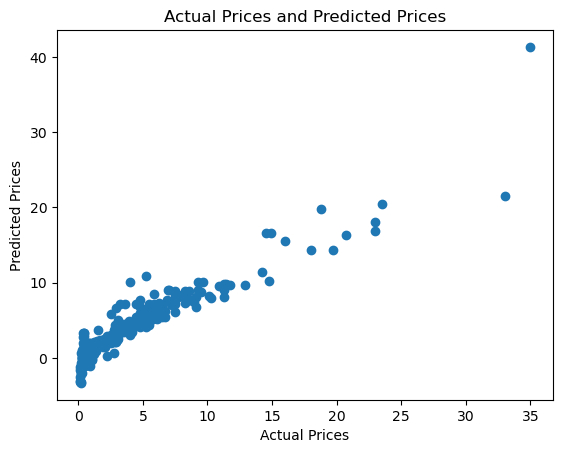

In [20]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices and Predicted Prices")
plt.show()

In [21]:
# Predictions on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [22]:
# R-squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R-squared Error: ", error_score)

R-squared Error:  0.8455496141809663


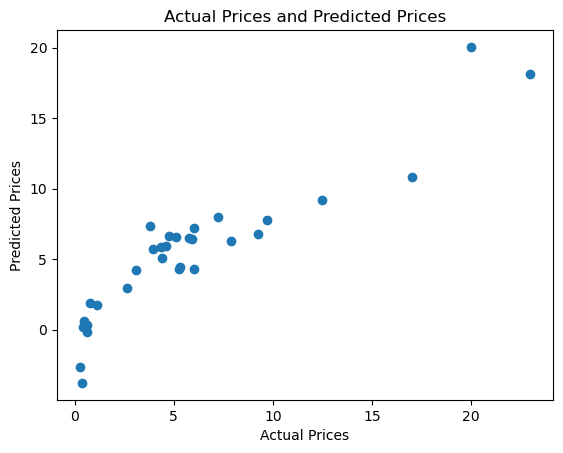

In [23]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices and Predicted Prices")
plt.show()

    2. Lasso Regression

In [24]:
lasso_reg_model = Lasso()

In [25]:
lasso_reg_model.fit(X_train, y_train)

Lasso()

Model Evaluation

In [26]:
# Predictions on training data
training_data_prediction = lasso_reg_model.predict(X_train)

In [27]:
# R-squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R-squared Error: ", error_score)

R-squared Error:  0.8410729980746277


Visualize the actual prices and predicted prices

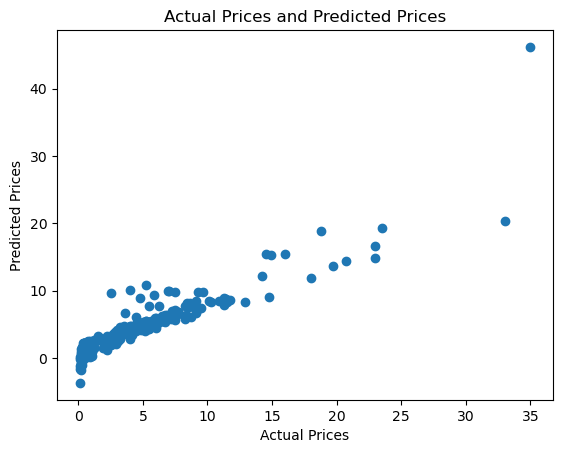

In [28]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices and Predicted Prices")
plt.show()

In [29]:
# Predictions on test data
test_data_prediction = lasso_reg_model.predict(X_test)

In [30]:
# R-squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R-squared Error: ", error_score)

R-squared Error:  0.8414991114937164


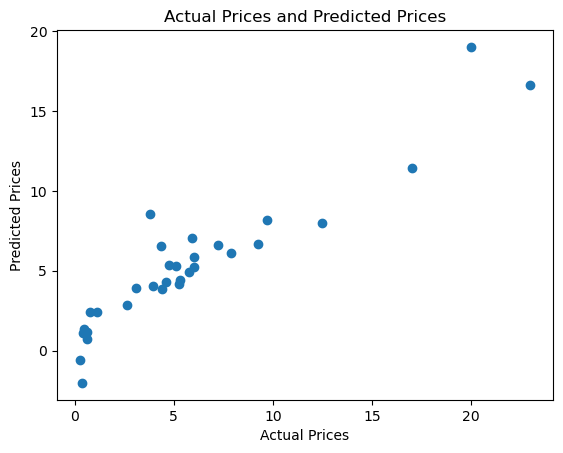

In [31]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices and Predicted Prices")
plt.show()